In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
#DATA PREPROCESSING
#Droping unimportant columns
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [20]:
#Finding the null values
df.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: xlabel='Annual Income (k$)'>

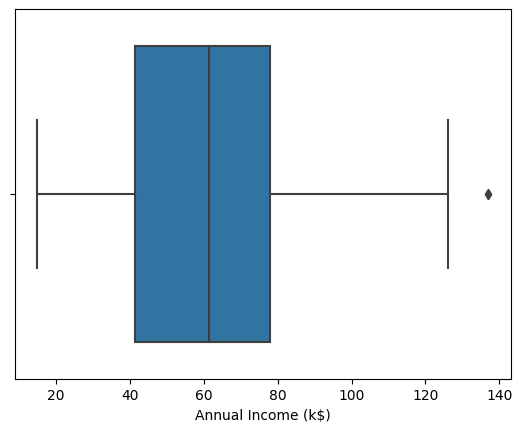

In [21]:
#Checking the outliers
sns.boxplot(x="Annual Income (k$)",data=df)

In [32]:
#Applying the winsorzier to remove the outlier
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method="iqr",tail="both",fold=1.5)
df["Annual Income (k$)"]=win.fit_transform(df[["Annual Income (k$)"]])

<Axes: xlabel='Spending Score (1-100)'>

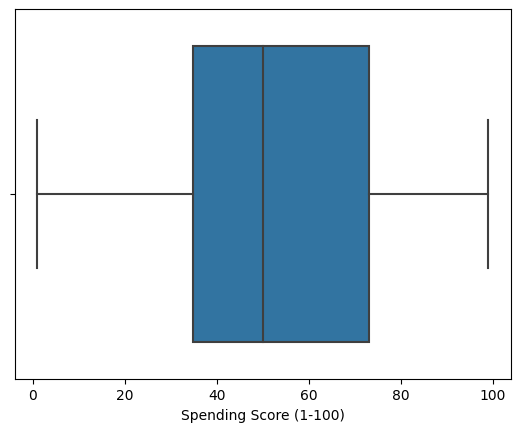

In [38]:
sns.boxplot(x="Spending Score (1-100)", data=df)

In [39]:
df["Spending Score (1-100)"].skew()

-0.047220201374263374

In [40]:
X=df

# ELBBOW CURVE


In [47]:
from sklearn.cluster import KMeans

In [51]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
print(wcss) 

C:\Users\avi61\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\avi61\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\avi61\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\avi61\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

[268717.56375, 180456.9539366883, 105529.63651521511, 72861.05249259227, 43639.878158556414, 36620.76718928144, 29829.06647116095, 24651.37536908846, 21386.52708845218, 19350.27019178788]


C:\Users\avi61\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


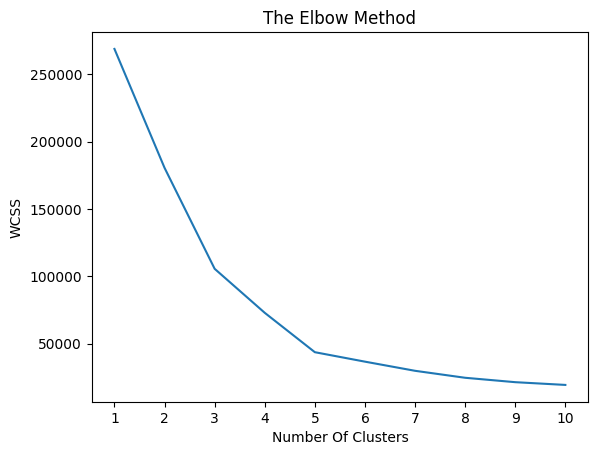

In [53]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.title("The Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS")
plt.show()

In [55]:
#MODELLING
kmeans=KMeans(n_clusters=5,init="k-means++")

#PREDICT
y_means=kmeans.fit_predict(X)
y_means

C:\Users\avi61\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [56]:
df["cluster"]=pd.DataFrame(y_means)

# visualize the cluster:


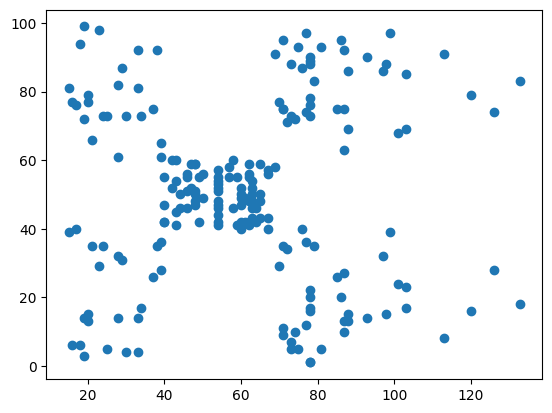

In [57]:
a=df.iloc[:,0]
b=df.iloc[:,1]

plt.scatter(a,b)
plt.show()